# Environment Setup
## Import the libraries

In [103]:
import os
import tensorflow as tf

#data visualization packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

#keras packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

dimension = 28

## Load dataset

In [104]:
imgs_path = "Dataset/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(os.path.abspath(img_path + "/" + img))
        im = im.resize((dimension,dimension))
        im = im.convert('L')
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


# Data Preprocessing

## Data preparation

### Test-train split

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Training shape: ",x_train.shape, y_train.shape)
print("Testing shape: ",x_test.shape, y_test.shape)

Training shape:  (31367, 28, 28) (31367,)
Testing shape:  (7842, 28, 28) (7842,)


### Reshaping data

In [106]:
x_train = x_train.reshape(31367, dimension*dimension)
x_test = x_test.reshape(7842, dimension*dimension)

### Feature scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

#fit and transform training dataset
x_train = minmax.fit_transform(x_train)
#transform testing dataset
x_test = minmax.transform(x_test)

## Data Visualisation

In [108]:
from random import randint
index = randint(0, len(x_train) - 1) # pick a random element from the train set
print(f"Pixel values range from {x_train[index].min()} to {x_train[index].max()}")
print(f"Shape of the image: {x_train[index].shape}")

Pixel values range from 0.07171314741035857 to 0.38645418326693226
Shape of the image: (784,)


In [109]:
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  43
Classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


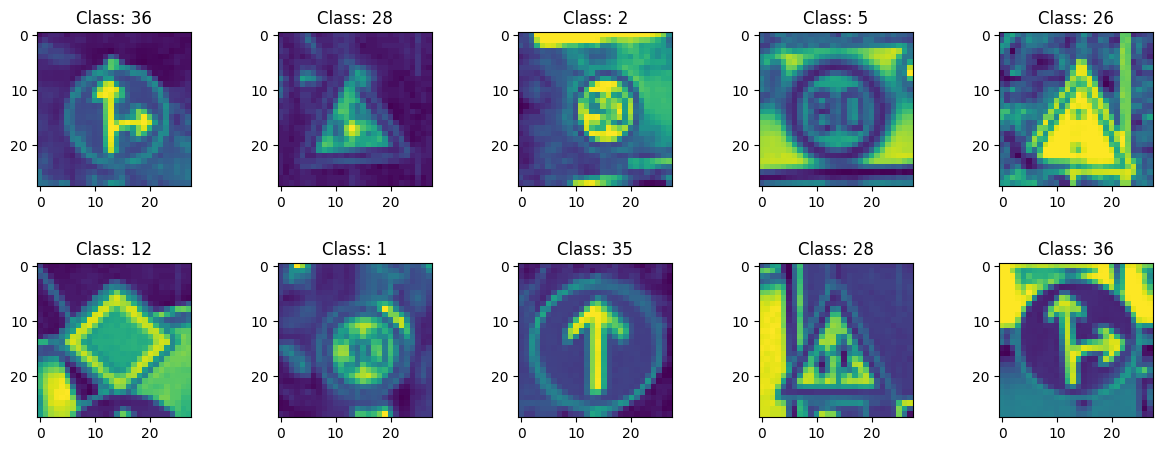

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15, 5))
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(x_train[i].reshape(dimension,dimension))
    ax[i].title.set_text('Class: ' + str(y_train[i]))
plt.subplots_adjust(hspace=0.5)
plt.show()

# Building Model and Validation

## Initialise Model

In [111]:
#initializing model
model = Sequential()
#add 1st hidden layer
model.add(Dense(input_dim = x_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
model.add(Dense(units = len(np.unique(y_train)), kernel_initializer='uniform', activation='sigmoid'))
#compile the neural network
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 43)                11051     
                                                                 
Total params: 212,011
Trainable params: 212,011
Non-trainable params: 0
_________________________________________________________________


## Train and validate

In [112]:
# history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
981/981 [==============================] - 1s 1ms/step - loss: 3.4587 - accuracy: 0.1205
Epoch 2/25
981/981 [==============================] - 1s 1ms/step - loss: 3.1618 - accuracy: 0.2602
Epoch 3/25
981/981 [==============================] - 1s 1ms/step - loss: 2.7804 - accuracy: 0.3649
Epoch 4/25
981/981 [==============================] - 1s 1ms/step - loss: 2.4326 - accuracy: 0.4222
Epoch 5/25
981/981 [==============================] - 1s 1ms/step - loss: 2.1543 - accuracy: 0.4695
Epoch 6/25
981/981 [==============================] - 1s 1ms/step - loss: 1.9257 - accuracy: 0.5211
Epoch 7/25
981/981 [==============================] - 2s 2ms/step - loss: 1.7323 - accuracy: 0.5702
Epoch 8/25
981/981 [==============================] - 2s 2ms/step - loss: 1.5707 - accuracy: 0.6136
Epoch 9/25
981/981 [==============================] - 1s 1ms/step - loss: 1.4358 - accuracy: 0.6528
Epoch 10/25
981/981 [==============================] - 1s 1ms/step - loss: 1.3192 - accuracy: 0.6857

In [113]:
model.evaluate(x_test, y_test)

246/246 [==============================] - 0s 996us/step - loss: 0.6633 - accuracy: 0.8629


[0.6632553339004517, 0.8629176020622253]